In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification

%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dataset

In [18]:
X = np.random.randint(2, size = (2, 400)) # creo una matrice con due numeri (0,1), su 2 colonne e 5 linee
Y = np.logical_xor(X[0],X[1]) # creo delle coppie tra le due linee della matrice X (restituisci True se "or" is True)
Y = Y.reshape(1,X.shape[1])*1 # forziamo la macchina a capire che per l'output voglio una linea e 5 colonne. Moltiplico per 1 per trsaformare True et False en 0 et 1

#print(X)
print(f"X.shape = {X.shape}")
# print(Y)
print(f"Y.shape = {Y.shape}")

X.shape = (2, 400)
Y.shape = (1, 400)


### Structure du reseaux

In [19]:
n_x = int(X.shape[0]) # n° of inputs units
print(f'Input layer = {n_x} units (n_x)')
n_h1 = 3 # n° of neurones dans l'hidden layer 1
print(f'Hidden layer 1 = {n_h1} units (n_h1)')
n_h2 = 3 # n° of neurones dans l'hidden layer 2
print(f'Hidden layer 2 = {n_h2} units (n_h2)')
n_y = int(Y.shape[0]) # n° of output units
print(f'Output layer = {n_y} output (n_y)')
nn_structure = {'n_x':n_x,'n_h1':n_h1,'n_h2':n_h2,'n_y':n_y}
print()
print(f'NN structure = {nn_structure}')

Input layer = 2 units (n_x)
Hidden layer 1 = 3 units (n_h1)
Hidden layer 2 = 3 units (n_h2)
Output layer = 1 output (n_y)

NN structure = {'n_x': 2, 'n_h1': 3, 'n_h2': 3, 'n_y': 1}


### Initialisation des parametres

In [20]:
def init_params(n_x,n_h1,n_h2,n_y):
    
    '''
    Function qui inizialize mes parametres
    
    Weight initialisés random, Bias initialisés à zero
    
    '''
    
    np.random.seed(0)
    
    w1 = np.random.randn(n_h1,n_x) / np.sqrt(n_x)
    w2 = np.random.randn(n_h2,n_h1) / np.sqrt(n_h1)
    w3 = np.random.randn(n_y,n_h2) / np.sqrt(n_h2)
    b1 = np.zeros((n_h1,1))
    b2 = np.zeros((n_h2,1))
    b3 = np.zeros((n_y,1))
    
    params = {'w1':w1, 'w2':w2, 'w3':w3, 'b1':b1, 'b2':b2, 'b3':b3}
    
    print(f'w1.shape = {w1.shape}')
    print(f'w2.shape = {w2.shape}')
    print(f'w3.shape = {w3.shape}')
    print(f'b1.shape = {b1.shape}')
    print(f'b2.shape = {b2.shape}')
    print(f'b3.shape = {b3.shape}')
    
    return params

In [21]:
params = init_params(n_x,n_h1,n_h2,n_y)

w1.shape = (3, 2)
w2.shape = (3, 3)
w3.shape = (1, 3)
b1.shape = (3, 1)
b2.shape = (3, 1)
b3.shape = (1, 1)


### Forward Propagation

In [22]:
def sigmoid(z):
    
    '''
    Fonction d'activation sigmoid
    
    '''
    
    s = 1 / (1 + np.exp(-z))
    
    return s

In [23]:
def forward(X, params):

    '''
    Fonction de forward propagation
    
    On recupere les parametres initialisés pour calculer la fonction de pre-activation Z

    '''
    w1 = params['w1'] 
    w2 = params['w2']
    w3 = params['w3']
    b1 = params['b1']
    b2 = params['b2']
    b3 = params['b3']
    
    z1 = np.dot(w1,X)+b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = sigmoid(z2)
    z3 = np.dot(w3,a2)+b3
    a3 = sigmoid(z3)
    
    cache = {'z1':z1, 'z2':z2, 'z3':z3, 'a1':a1, 'a2':a2, 'a3':a3}
    
    #print(f'a1.shape = {a1.shape}')
    #print(f'a2.shape = {a2.shape}')
    #print(f'a3.shape = {a3.shape}')
    
    return cache, a3

In [24]:
cache, a3 = forward(X, params)
cache, a3

({'z1': array([[ 0.28295388,  1.24737338,  0.        , ...,  1.24737338,
           1.24737338,  0.28295388],
         [ 1.58455078,  0.69207227,  0.        , ...,  0.69207227,
           0.69207227,  1.58455078],
         [-0.69103982,  1.32056292,  0.        , ...,  1.32056292,
           1.32056292, -0.69103982]]),
  'z2': array([[0.22040291, 0.32085349, 0.20077712, ..., 0.32085349, 0.32085349,
          0.22040291],
         [0.48446934, 0.90227618, 0.57992398, ..., 0.90227618, 0.90227618,
          0.48446934],
         [0.39440604, 0.59041348, 0.3829495 , ..., 0.59041348, 0.59041348,
          0.39440604]]),
  'z3': array([[0.56992503, 0.64910174, 0.58850759, 0.63443955, 0.64910174,
          0.63443955, 0.64910174, 0.58850759, 0.63443955, 0.58850759,
          0.58850759, 0.64910174, 0.64910174, 0.58850759, 0.64910174,
          0.58850759, 0.64910174, 0.58850759, 0.56992503, 0.58850759,
          0.56992503, 0.56992503, 0.64910174, 0.63443955, 0.56992503,
          0.56992503, 

In [25]:
def cost_funct(A,Y):
    
    '''
    Cost function
    
    '''
    
    m = Y.shape[1]
    
    logprob = (Y * np.log(A) + (1-Y) * np.log(1-A))
    #ensuite la cost
    cost = -(np.sum(logprob))/m
    #je veux que l'on me retourne un nombre et non pas un array
    cost = np.squeeze(cost)
    #être sur que j'ai la cost au bon format
    assert(isinstance(cost,float))

    return cost

In [26]:
cost = cost_funct(a3,Y)
cost

0.7365344574339591

### Backward Propagation

In [27]:
def backward(X, Y, cache, params, l_r):
    
    a3 = cache['a3']
    a2 = cache['a2']
    a1 = cache['a1']
    w3 = params['w3']
    w2 = params['w2']
    w1 = params['w1']
    b1 = params['b1']
    b2 = params['b2']
    b3 = params['b3']
    
    m = Y.shape[1]
    
    dz3 = a3 - Y
    dw3 = 1/m * np.dot(dz3, a2.T)
    db3 = 1/m * np.sum(dz3, axis=1, keepdims=True)
    
    dz2 = (np.dot(w3.T, dz3)) * (1 - (a2**2))
    dw2 = 1/m * np.dot(dz2, a1.T)
    db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
    
    dz1 = (np.dot(w2.T, dz2)) * (1 - (a1**2)) 
    dw1 = 1/m * np.dot(dz1, X.T)
    db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)
    
    w1 = params['w1'] - l_r * dw1
    b1 = params['b1'] - l_r * db1
    w2 = params['w2'] - l_r * dw2
    b2 = params['b2'] - l_r * db2
    w3 = params['w3'] - l_r * dw3
    b3 = params['b3'] - l_r * db3
    
    params['w1'] = w1
    params['b1'] = b1
    params['w2'] = w2
    params['b2'] = b2
    params['w3'] = w3
    params['b3'] = b3
    
    return params

In [28]:
backward(X, Y, cache, params, 1) # test backward function with learning rate = 1

{'w1': array([[ 1.24451328,  0.28472377],
        [ 0.69241826,  1.58465333],
        [ 1.29810297, -0.69257866]]),
 'w2': array([[ 0.5362968 , -0.09972512, -0.07078492],
        [ 0.19279395,  0.0402112 ,  0.79770116],
        [ 0.44615493,  0.07699146,  0.26253763]]),
 'w3': array([[ 0.11145272,  0.76630528, -0.20728461]]),
 'b1': array([[-0.01154205],
        [-0.0017971 ],
        [-0.03584539]]),
 'b2': array([[-0.01874434],
        [-0.06798177],
        [ 0.01044611]]),
 'b3': array([[-0.14334609]])}

In [29]:
def accuracy(Predictions, Labels):

    """
    Predictions shape (1, m)
    Labels shape (1, m)
    """
    
    n_correct = np.sum(Predictions == Labels)
    n_total   = Predictions.shape[1]
    
    accuracy = n_correct / n_total
    
    return accuracy

In [30]:
accuracy(Y, Y) # test accuracy function with labels & labels (doit retourner 1)

1.0

In [31]:
def nn_model(X,Y,n_x,n_h1,n_h2,n_y, print_freq=100):
    
    # Initialisation
    params = init_params(n_x,n_h1,n_h2,n_y)
    
    # Iterations and Learning rate
    num_iter = int(input('\nHow many iterations ? '))
    l_r = float(input('\nLearning rate ? '))
    
    #Loops
    for i in range(0, num_iter):
        # Forward ==> Prediciton a3
        cache, a3 = forward(X, params)
        # Cost function
        cost = cost_funct(a3, Y)
        # Backward ==> Update parameters
        params = backward(X, Y, cache, params, l_r)
        
        if i % print_freq == 0 :
                print(f'\nCost after iteration {i} : {cost}')
            
    Predictions = (a3 > 0.5) * 1.
    print(f"\nTrain accuracy: ", accuracy(Predictions, Y))
        
    return params

In [32]:
params = nn_model(X,Y,n_x,n_h1,n_h2,n_y)

w1.shape = (3, 2)
w2.shape = (3, 3)
w3.shape = (1, 3)
b1.shape = (3, 1)
b2.shape = (3, 1)
b3.shape = (1, 1)

How many iterations ? 1000

Learning rate ? 0.5

Cost after iteration 0 : 0.7365344574339591

Cost after iteration 100 : 0.6926344955938711

Cost after iteration 200 : 0.690589820512279

Cost after iteration 300 : 0.6797600745047302

Cost after iteration 400 : 0.6226549769490068

Cost after iteration 500 : 0.4351283130501834

Cost after iteration 600 : 0.5895881361037388

Cost after iteration 700 : 0.7520085807567476

Cost after iteration 800 : 0.04779294016381861

Cost after iteration 900 : 0.04780572115746409

Train accuracy:  1.0


In [78]:
def predict(X, Y, params):
    
    m = X.shape[1]
    
    w3 = params['w3']
    w2 = params['w2']
    w1 = params['w1']
    b1 = params['b1']
    b2 = params['b2']
    b3 = params['b3']
    
    a1 = sigmoid(np.dot(w1, X)+b1)
    a2 = sigmoid(np.dot(w2, a1)+b2)
    a3 = sigmoid(np.dot(w3, a2)+b3)
    
    Y_pred = (a3 > 0.5)*1
    
    return Y_pred

In [80]:
Y_pred = predict(X,Y,params)

In [81]:
accuracy(Y_pred, Y)

1.0

### Database Test

In [93]:
X_test = np.random.randint(2, size = (2, 50)) 
Y_test = np.logical_xor(X_test[0],X_test[1]).reshape(1,X_test.shape[1])*1

In [94]:
Y_pred = predict(X_test,Y_test,params)

In [95]:
accuracy(Y_pred, Y_test)

1.0

In [96]:
def plot_dataset(x, y):
    
    """ Permet d'afficher les classes `y` d'exemples à 2 features `X`
    Warning: La dimension des exemples doit être la première.
    
    Soit m, le nombre d'exemples.
    
    X, matrices d'exemples, deux features par exemple; shape=(2, m))
    y, matrices de labels, shape=(1, m)
    
    return: None
    """
    

    print(x.shape)
    print(y.shape)
    
    plt.scatter(x[0,:], x[1,:], c=y[0,:], cmap=plt.cm.jet) 
    
    return None

(2, 50)
(1, 50)


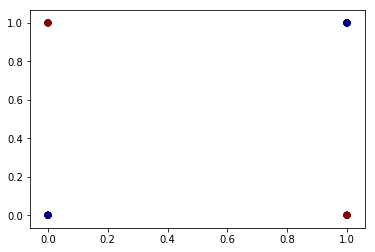

In [100]:
plot_dataset(X_test,Y_test)